In [1]:
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt# Reading data

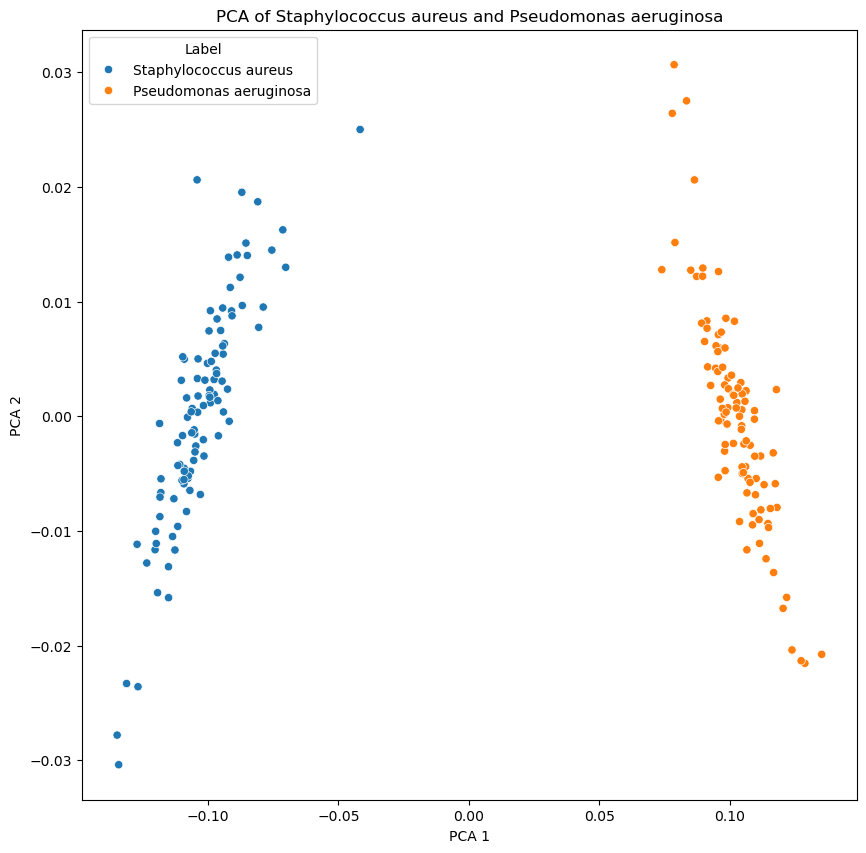

In [4]:
# Load data
sa = np.loadtxt("SA.txt")
pa = np.loadtxt("PA.txt")

# Prepare data and labels
data = np.append(pa, sa, axis=0)
labels = ["Staphylococcus aureus" for x in range(100)] + ["Pseudomonas aeruginosa" for x in range(100)]
labels = np.array(labels)

# Run PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Create a DataFrame for plotting
df = pd.DataFrame(data_2d, columns=["PCA 1", "PCA 2"])
df["Label"] = labels

# Plotting using Seaborn
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x="PCA 1", y="PCA 2", hue="Label", data=df)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("PCA of Staphylococcus aureus and Pseudomonas aeruginosa")
plt.savefig("PCA.png")
plt.show()


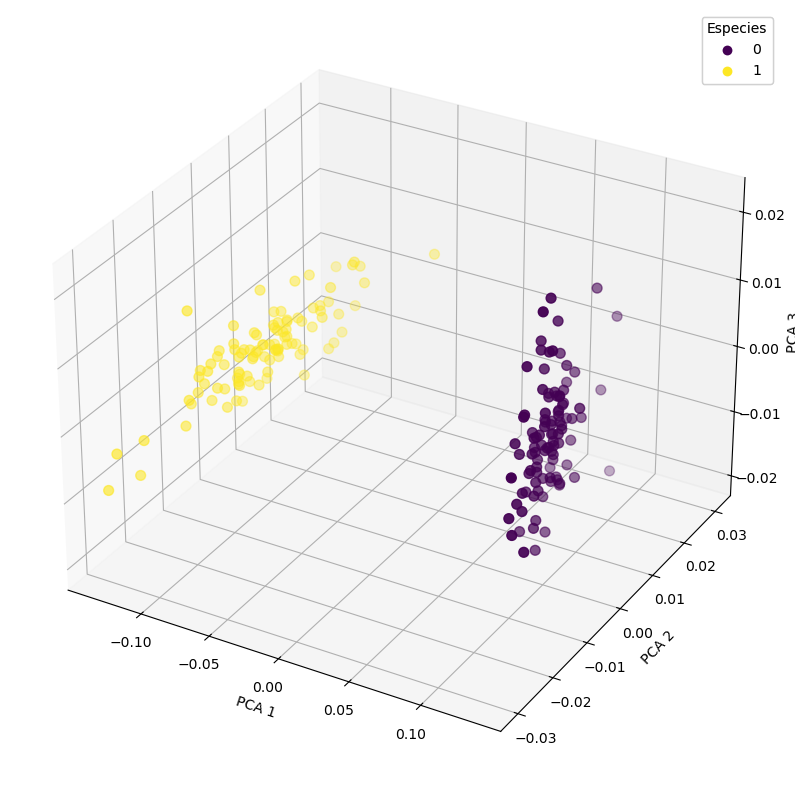

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Cargando los datos
sa = np.loadtxt("SA.txt")
pa = np.loadtxt("PA.txt")

# Preparando los datos y las etiquetas
data = np.append(pa, sa, axis=0)
labels = ["Staphylococcus aureus" for _ in range(100)]
labels += ["Pseudomonas aeruginosa" for _ in range(100)]
labels = np.array(labels)

# Ejecutando PCA con 3 componentes
pca = PCA(n_components=3)
data_3d = pca.fit_transform(data)

# Graficando en 3D con Matplotlib
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Usando scatter plot para graficar los puntos en 3D
scatter = ax.scatter(data_3d[:, 0], data_3d[:, 1], data_3d[:, 2], c=[1 if label == "Staphylococcus aureus" else 0 for label in labels], cmap="viridis", s=50)

# Etiquetando los ejes
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

# Añadiendo leyenda
legend1 = ax.legend(*scatter.legend_elements(), title="Especies")
ax.add_artist(legend1)

# Guardando el gráfico
plt.savefig("PCA_3D.png")
plt.show()


In [7]:
import numpy as np
from sklearn.decomposition import PCA

# Cargando los datos
sa = np.loadtxt("SA.txt")
pa = np.loadtxt("PA.txt")

# Preparando los datos
data = np.append(pa, sa, axis=0)

# Ejecutando PCA con 3 componentes
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data)

# Imprimiendo la varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print("Varianza explicada por cada componente:")
for i, var in enumerate(explained_variance):
    print(f"Componente {i+1}: {var*100:.2f}%")

# Imprimiendo la varianza total explicada por los 2 primeros componentes
var_total_2d = explained_variance[0] + explained_variance[1]
print(f"\nVarianza total explicada por los dos primeros componentes (2D): {var_total_2d*100:.2f}%")

# Imprimiendo la varianza total explicada por los 3 primeros componentes
var_total_3d = var_total_2d + explained_variance[2]
print(f"Varianza total explicada por los tres primeros componentes (3D): {var_total_3d*100:.2f}%")


Varianza explicada por cada componente:
Componente 1: 96.95%
Componente 2: 0.85%
Componente 3: 0.34%

Varianza total explicada por los dos primeros componentes (2D): 97.80%
Varianza total explicada por los tres primeros componentes (3D): 98.14%
